In [117]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

In [118]:
stock_data=pd.read_csv('./data/AAPL_2015_to_2020_yahoo_finance.csv')

## Apple events and quarterly results

In [119]:
#List of dates for the apple events
apple_event_dates_str=["2015-03-09","2015-06-10","2015-09-09",
"2016-03-21","2016-06-15","2016-09-07", "2016-10-27",
"2017-06-07", "2017-09-12",
"2018-03-27","2018-06-06", "2018-09-12", "2018-10-30",
"2019-03-25","2019-06-05","2019-09-10","2019-12-02",
"2020-06-24","2020-09-15","2020-10-13","2020-11-10"]

apple_event_dates=[dt.datetime.strptime(date, "%Y-%m-%d").date() for date in apple_event_dates_str]

In [120]:
#Create a new dataframe only containing stock data from Apple event-days
apple_event_and_stock_data=stock_data[stock_data.Date.isin(apple_event_dates_str)]
apple_event_and_stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
44,2015-03-09,31.990000,32.392502,31.264999,31.785000,28.890726,354114000
109,2015-06-10,31.980000,32.334999,31.962500,32.220001,29.408445,156349200
172,2015-09-09,28.440001,28.504999,27.442499,27.537500,25.248312,340043200
305,2016-03-21,26.482500,26.912500,26.285000,26.477501,24.512644,142010800
365,2016-06-15,24.455000,24.602501,24.257500,24.285000,22.619728,117780800


In [121]:
#https://finance.yahoo.com/calendar/earnings?symbol=AAPL
quarterly_earnings=pd.read_excel('./data/Earnings_Apple.xlsx')
quarterly_earnings

,Symbol,Company,Earnings Date,EPS Estimate,Reported EPS,Surprise(%)
0,AAPL,Apple Inc,"Oct 26, 2022, 5 AMEST",-,-,-
1,AAPL,Apple Inc,"Jul 25, 2022, 5 AMEST",-,-,-
2,AAPL,Apple Inc,"Apr 26, 2022, 5 AMEST",-,-,-
3,AAPL,Apple Inc,"Jan 25, 2022, 5 AMEST",1.88,-,-
4,AAPL,Apple Inc.,"Oct 28, 2021, 12 AMEST",1.24,1.24,+0.32
5,AAPL,Apple Inc.,"Jul 27, 2021, 12 AMEST",1.01,1.3,+29.1
6,AAPL,Apple Inc.,"Apr 28, 2021, 12 AMEST",0.99,1.4,+41.84
7,AAPL,Apple Inc.,"Jan 27, 2021, 12 AMEST",1.41,1.68,+18.98
8,AAPL,Apple Inc.,"Oct 29, 2020, 12 AMEST",0.7,0.73,+4.29
9,AAPL,Apple Inc.,"Jul 30, 2020, 12 AMEST",0.51,0.65,+26.22


In [122]:
#Remove the 8 first rows to only keep quarterly earnings between 2015-2020
quarterly_earnings=quarterly_earnings.drop(index=[0,1,2,3,4,5,6,7])

#Change the format of the Earnings Date column to be able to compare it with the Stock dataframe
quarterly_earnings["Earnings Date"]=quarterly_earnings["Earnings Date"].map(lambda x: x.replace(", 12 AMEST", "").replace(",", ""))
quarterly_earnings["Earnings Date"]=quarterly_earnings["Earnings Date"].map(lambda x: dt.datetime.strptime(x, "%b %d %Y").strftime("%Y-%m-%d"))

#
apple_earnings_and_stock_data=stock_data[stock_data.Date.isin(quarterly_earnings["Earnings Date"])]

In [123]:
apple_earnings_and_stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
16,2015-01-27,28.105000,28.120001,27.257500,27.285000,24.702991,382274800
78,2015-04-27,33.077499,33.282501,32.787498,33.162498,30.142799,387816800
137,2015-07-21,33.212502,33.230000,32.580002,32.687500,29.835148,307025600
206,2015-10-27,28.850000,29.135000,28.497499,28.637501,26.256874,279537600
267,2016-01-26,24.982500,25.219999,24.517500,24.997499,23.017569,300308000


## Add data to dates where the stock market is closed

In [124]:
stock_data_with_closed_days=stock_data.copy()
idx = pd.date_range('2015-01-02', '2020-12-31')
stock_data_with_closed_days.index = pd.DatetimeIndex(df.Date)
stock_data_with_closed_days = stock_data_with_closed_days.reindex(idx, method='ffill').reset_index()


In [125]:
stock_data_with_closed_days.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,2015-01-02,27.8475,27.860001,26.837500,27.332500,24.745993,212818400
1,2015-01-03,2015-01-02,27.8475,27.860001,26.837500,27.332500,24.745993,212818400
2,2015-01-04,2015-01-02,27.8475,27.860001,26.837500,27.332500,24.745993,212818400
3,2015-01-05,2015-01-05,27.0725,27.162500,26.352501,26.562500,24.048859,257142000
4,2015-01-06,2015-01-06,26.6350,26.857500,26.157499,26.565001,24.051128,263188400


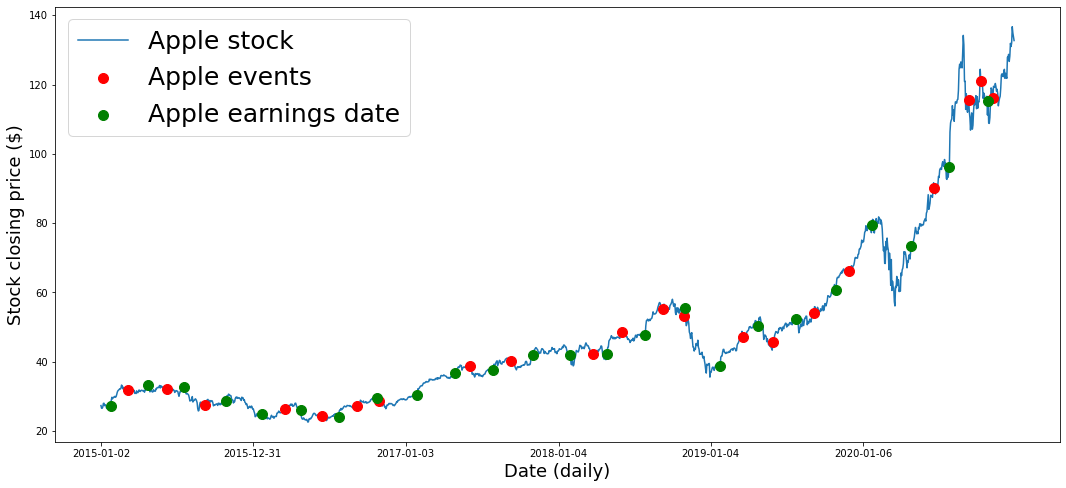

In [147]:
#Plots the dates after adding the 
fig,ax = plt.subplots(figsize=(18,8))
ax.plot(stock_data_with_closed_days.Date,stock_data_with_closed_days.Close, label='Apple stock')
ax.set_xlabel("Date (daily)", size=18)
ax.set_ylabel('Stock closing price ($)', size=18)
plt.xticks(stock_data_with_closed_days.Date[::366])
ax.scatter(apple_event_and_stock_data.Date, apple_event_and_stock_data.Close, c="r", s=100, zorder=3, label='Apple events')
ax.scatter(apple_earnings_and_stock_data.Date, apple_earnings_and_stock_data.Close, c="g", s=100, zorder=3, label='Apple earnings date')
ax.legend(prop={'size': 25})
plt.show()

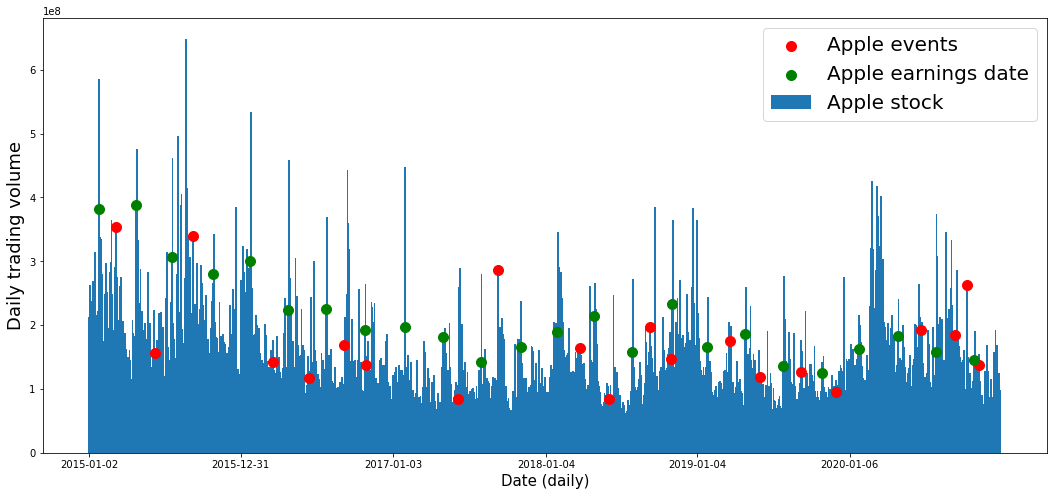

In [150]:
#Plot each trading day and its volume
fig,ax = plt.subplots(figsize=(18,8))
ax.bar(stock_data_with_closed_days.Date,stock_data_with_closed_days.Volume, label='Apple stock', width=3, align='center')
ax.set_xlabel("Date (daily)",size=15)
ax.set_ylabel('Daily trading volume', size=18)
plt.xticks(stock_data_with_closed_days.Date[::366])
ax.scatter(apple_event_and_stock_data.Date, apple_event_and_stock_data.Volume, c="r", s=100, zorder=3, label='Apple events')
ax.scatter(apple_earnings_and_stock_data.Date, apple_earnings_and_stock_data.Volume, c="g", s=100, zorder=3, label='Apple earnings date')
ax.legend(prop={'size': 20})
plt.show()

## Group by week

In [132]:
stock_data_weekly_average=df.copy()

In [135]:
#Create a new dataframe containing the weekly average of the stock price
#https://stackoverflow.com/questions/45281297/group-by-week-in-pandas/45281439
stock_data_weekly_average.Date = pd.to_datetime(stock_data_weekly_average.Date) - pd.to_timedelta(7, unit='d')
stock_data_weekly_average = stock_data_weekly_average.groupby([pd.Grouper(key='Date', freq='W-MON')]).mean().reset_index().sort_values('Date')


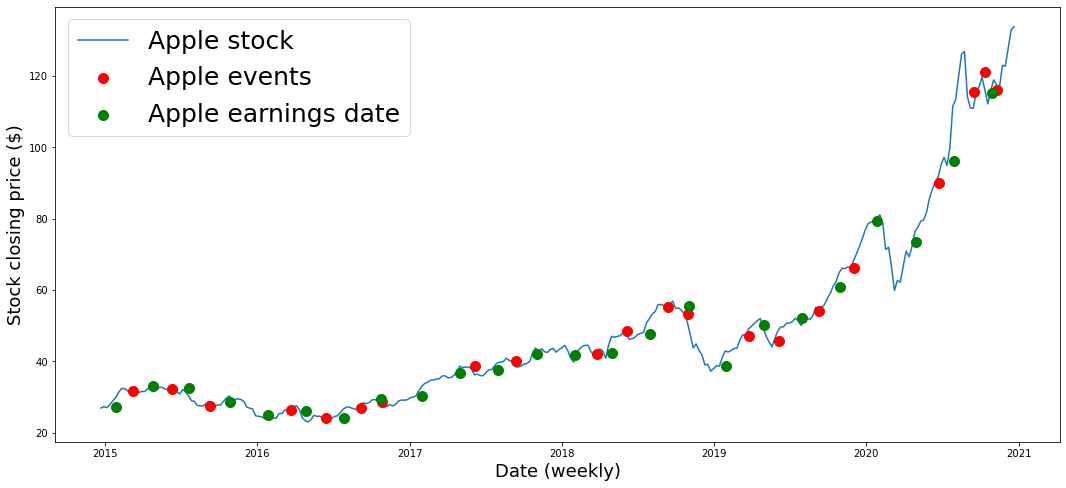

In [149]:
#Plots the weekly average
fig,ax = plt.subplots(figsize=(18,8))
ax.plot(stock_data_weekly_average.Date,stock_data_weekly_average.Close, label='Apple stock')
apple_events=ax.set_xlabel("Date (weekly)",size=18)
ax.set_ylabel('Stock closing price ($)', size=18)
ax.scatter(apple_event_and_stock_data.Date, apple_event_and_stock_data.Close, c="r", s=100, zorder=3, label='Apple events')
ax.scatter(apple_earnings_and_stock_data.Date, apple_earnings_and_stock_data.Close, c="g", s=100, zorder=3, label='Apple earnings date')
ax.legend(prop={'size': 25})
plt.show();

In [137]:
apple_event_and_stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
44,2015-03-09,31.990000,32.392502,31.264999,31.785000,28.890726,354114000
109,2015-06-10,31.980000,32.334999,31.962500,32.220001,29.408445,156349200
172,2015-09-09,28.440001,28.504999,27.442499,27.537500,25.248312,340043200
305,2016-03-21,26.482500,26.912500,26.285000,26.477501,24.512644,142010800
365,2016-06-15,24.455000,24.602501,24.257500,24.285000,22.619728,117780800
